<br>
<br>
<br>
# 연관규칙분석 - 공생앱과 경쟁앱
<br>

---

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',50)
pd.set_option('max_rows',100)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

In [2]:
font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path) # 얘네는 한번 선언만 하면 됨

In [10]:
DA_final = pd.read_csv("DA_final.csv")

AR_App = pd.read_csv('AR_target_app.csv')

In [11]:
# 분류기 만들때 쓸 변수들!
# 여기에 목적 앱 바이너리 컬럼을 붙이고, 그걸 이 데이터를 통해 맞추는 식으로 하면 된다!
# app 변수 목록에 타겟 앱이 없도록 주의!
# 예륻 들어 스타벅스의 경우 app_스타벅스를 빼고, AR_App의 스타벅스 컬럼을 타겟으로 분류기 만들면 됨

DA_final.head()

,pid,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,A0002542,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,A0003204,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,A0003768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,A0008228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [12]:
freq_mart = AR_App[['panel_id','이마트몰', '롯데마트몰', '홈플러스']]

In [13]:
# 이미 알지만 freq check

freq_mart.sum()

panel_id    A0002542A0003204A0003696A0003768A0008228A00091...
이마트몰                                                      890
롯데마트몰                                                     667
홈플러스                                                      831
dtype: object

In [14]:
freq_mart['이마트_홈플'] = (freq_mart['이마트몰']+freq_mart['홈플러스']).map(lambda x: 0 if x<1 else 1)
freq_mart['둘다'] = (freq_mart['이마트_홈플'] + freq_mart['롯데마트몰']).map(lambda x: 0 if x<2 else 1)
freq_mart['이마트_홈플만'] = (freq_mart['이마트_홈플'] - freq_mart['둘다']).map(lambda x: 0 if x<1 else 2)
freq_mart['롯데마트몰만'] = (freq_mart['롯데마트몰'] - freq_mart['둘다']).map(lambda x: 0 if x<1 else 3)

freq_mart['mart_target'] = (freq_mart['이마트_홈플만'] + freq_mart['롯데마트몰만'] + freq_mart['둘다'])
freq_mart = freq_mart[['panel_id', 'mart_target']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [15]:
freq_mart['mart_target'].value_counts()

0    7864
2    1150
3     354
1     313
Name: mart_target, dtype: int64

In [16]:
del DA_final['App_이마트몰']
del DA_final['App_이마트']
del DA_final['App_홈플러스']
del DA_final['App_롯데마트몰']

del DA_final['Mean_이마트몰']
del DA_final['Mean_이마트']
del DA_final['Mean_홈플러스']
del DA_final['Mean_롯데마트몰']

del DA_final['Std_이마트몰']
del DA_final['Std_이마트']
del DA_final['Std_홈플러스']
del DA_final['Std_롯데마트몰']


In [17]:
DA_mart = freq_mart.merge(DA_final, how='left', left_on='panel_id', right_on='pid')

In [18]:
del DA_mart['panel_id']
del DA_mart['pid']

In [19]:
DA_mart.head()

,mart_target,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_티몬,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_화해,Std_후스콜,Std_후후
0,0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.749857,0.0
1,2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.0,0.000000,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.197531,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.290898,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,19.989997,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.0,0.000000,0.0


In [20]:
cat_col = ['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own']

column_dict = pd.DataFrame(DA_mart.columns).reset_index().rename(columns={'index':'feature_number', 0:'feature'})
num_cat_col = list(column_dict[lambda x: x['feature'].isin(cat_col)]['feature_number'])

In [21]:

DA_mart[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own']] = \
DA_mart[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own']].fillna(0).applymap(lambda x: str(int(x)))

In [22]:
DA_mart = DA_mart.fillna(0)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [23]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score, train_test_split

# Models for Classification
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from lightgbm import LGBMClassifier

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from sklearn import pipeline, metrics
from sklearn.utils import shuffle

from sklearn.metrics import auc, f1_score, accuracy_score, log_loss
my_scorer = metrics.make_scorer(auc, greater_is_better = True)

In [24]:
DA_mart.head()

,mart_target,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_티몬,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_화해,Std_후스콜,Std_후후
0,0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,8.749857,0.0
1,2,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.0,0.000000,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.197531,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.290898,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,19.989997,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.0,0.000000,0.0


In [25]:
features = DA_mart.columns[1:]

In [26]:
cbc = CatBoostClassifier(
 learning_rate =0.1,
 iterations=400,
 loss_function='MultiClass'
)

In [27]:
cbc.fit(DA_mart[features], DA_mart['mart_target'], cat_features=num_cat_col)

0:	learn: -1.2168629	total: 1.25s	remaining: 8m 16s
1:	learn: -1.0982111	total: 1.83s	remaining: 6m 5s
2:	learn: -1.0094184	total: 2.39s	remaining: 5m 16s
3:	learn: -0.9395435	total: 3s	remaining: 4m 56s
4:	learn: -0.8833414	total: 3.35s	remaining: 4m 24s
5:	learn: -0.8352825	total: 3.67s	remaining: 4m 1s
6:	learn: -0.7975763	total: 3.98s	remaining: 3m 43s
7:	learn: -0.7636534	total: 4.37s	remaining: 3m 33s
8:	learn: -0.7342862	total: 4.74s	remaining: 3m 25s
9:	learn: -0.7107973	total: 5.07s	remaining: 3m 17s
10:	learn: -0.6893544	total: 5.38s	remaining: 3m 10s
11:	learn: -0.6728644	total: 5.77s	remaining: 3m 6s
12:	learn: -0.6554781	total: 6.16s	remaining: 3m 3s
13:	learn: -0.6419594	total: 6.48s	remaining: 2m 58s
14:	learn: -0.6281853	total: 6.8s	remaining: 2m 54s
15:	learn: -0.6175636	total: 7.18s	remaining: 2m 52s
16:	learn: -0.6079750	total: 7.52s	remaining: 2m 49s
17:	learn: -0.6000351	total: 7.83s	remaining: 2m 46s
18:	learn: -0.5920908	total: 8.14s	remaining: 2m 43s
19:	learn: 

155:	learn: -0.4510042	total: 53.5s	remaining: 1m 23s
156:	learn: -0.4507108	total: 53.8s	remaining: 1m 23s
157:	learn: -0.4505042	total: 54.2s	remaining: 1m 22s
158:	learn: -0.4500488	total: 54.5s	remaining: 1m 22s
159:	learn: -0.4499077	total: 54.8s	remaining: 1m 22s
160:	learn: -0.4495406	total: 55.1s	remaining: 1m 21s
161:	learn: -0.4490193	total: 55.5s	remaining: 1m 21s
162:	learn: -0.4486790	total: 55.8s	remaining: 1m 21s
163:	learn: -0.4485483	total: 56.1s	remaining: 1m 20s
164:	learn: -0.4483266	total: 56.4s	remaining: 1m 20s
165:	learn: -0.4482364	total: 56.8s	remaining: 1m 20s
166:	learn: -0.4480037	total: 57.1s	remaining: 1m 19s
167:	learn: -0.4475978	total: 57.4s	remaining: 1m 19s
168:	learn: -0.4471437	total: 57.7s	remaining: 1m 18s
169:	learn: -0.4468295	total: 58.1s	remaining: 1m 18s
170:	learn: -0.4464536	total: 58.4s	remaining: 1m 18s
171:	learn: -0.4461069	total: 58.7s	remaining: 1m 17s
172:	learn: -0.4459411	total: 59s	remaining: 1m 17s
173:	learn: -0.4457197	total: 

308:	learn: -0.4004230	total: 1m 43s	remaining: 30.6s
309:	learn: -0.3996395	total: 1m 44s	remaining: 30.3s
310:	learn: -0.3993669	total: 1m 44s	remaining: 30s
311:	learn: -0.3990046	total: 1m 44s	remaining: 29.6s
312:	learn: -0.3986020	total: 1m 45s	remaining: 29.3s
313:	learn: -0.3980698	total: 1m 45s	remaining: 28.9s
314:	learn: -0.3979227	total: 1m 45s	remaining: 28.6s
315:	learn: -0.3976964	total: 1m 46s	remaining: 28.3s
316:	learn: -0.3974953	total: 1m 46s	remaining: 27.9s
317:	learn: -0.3971053	total: 1m 46s	remaining: 27.6s
318:	learn: -0.3970309	total: 1m 47s	remaining: 27.2s
319:	learn: -0.3968521	total: 1m 47s	remaining: 26.9s
320:	learn: -0.3963360	total: 1m 47s	remaining: 26.6s
321:	learn: -0.3958850	total: 1m 48s	remaining: 26.2s
322:	learn: -0.3957987	total: 1m 48s	remaining: 25.9s
323:	learn: -0.3954507	total: 1m 48s	remaining: 25.5s
324:	learn: -0.3952743	total: 1m 49s	remaining: 25.2s
325:	learn: -0.3951476	total: 1m 49s	remaining: 24.9s
326:	learn: -0.3949982	total: 

In [28]:
cbc.score(DA_mart[features], DA_mart['mart_target'])

0.87181076335089347

In [29]:
from catboost import Pool
p = Pool(DA_mart[features], DA_mart['mart_target'], cat_features=num_cat_col)

In [ ]:
cbc.get_feature_importance(p)

In [ ]:
cbc.eval_metrics(p, 
             metrics = ['Accuracy','AUC'])

In [ ]:
len(features)

In [ ]:
len(cbc.get_feature_importance(p))

In [30]:
mart_FE = pd.DataFrame(features)
mart_FE['importance'] = cbc.get_feature_importance(p)
mart_FE = mart_FE.rename(columns={0:'feature'})

In [31]:
mart_FE.sort_values(by='importance', ascending=False)

,feature,importance
117,App_쇼핑,18.075524
441,PS_age,2.827260
414,PS_BirthYear,2.823455
120,App_식음료,1.777344
419,PS_sex,1.747678
90,App_app_counted,1.659089
106,App_라이프스타일,1.468061
415,PS_wedding,1.387136
384,App_쿠팡,1.173075
161,App_GS SHOP,1.012579


In [32]:
DA_mart['mart_target_str'] = DA_mart['mart_target'].map(lambda x: 'Neither' if x == 0 
                            else 'Both' if x == 1
                            else 'E&H_only' if x == 2
                            else 'Lotte_only')

In [61]:
DA_mart.groupby('mart_target_str')['Mean_후후'].agg([np.mean, np.std, np.median])

,mean,std,median
mart_target_str,,,
Both,8.531825,11.896961,0.0
E&H_only,6.096506,10.535751,0.0
Lotte_only,5.753550,10.635650,0.0
Neither,5.361379,10.256282,0.0


In [57]:
DA_mart.groupby('mart_target_str')['App_쿠팡'].agg([np.mean, np.std, np.median])

,mean,std,median
mart_target_str,,,
Both,4.207668,4.009405,4.0
E&H_only,3.893043,4.041327,2.0
Lotte_only,2.985876,3.877344,0.0
Neither,1.949644,3.218762,0.0


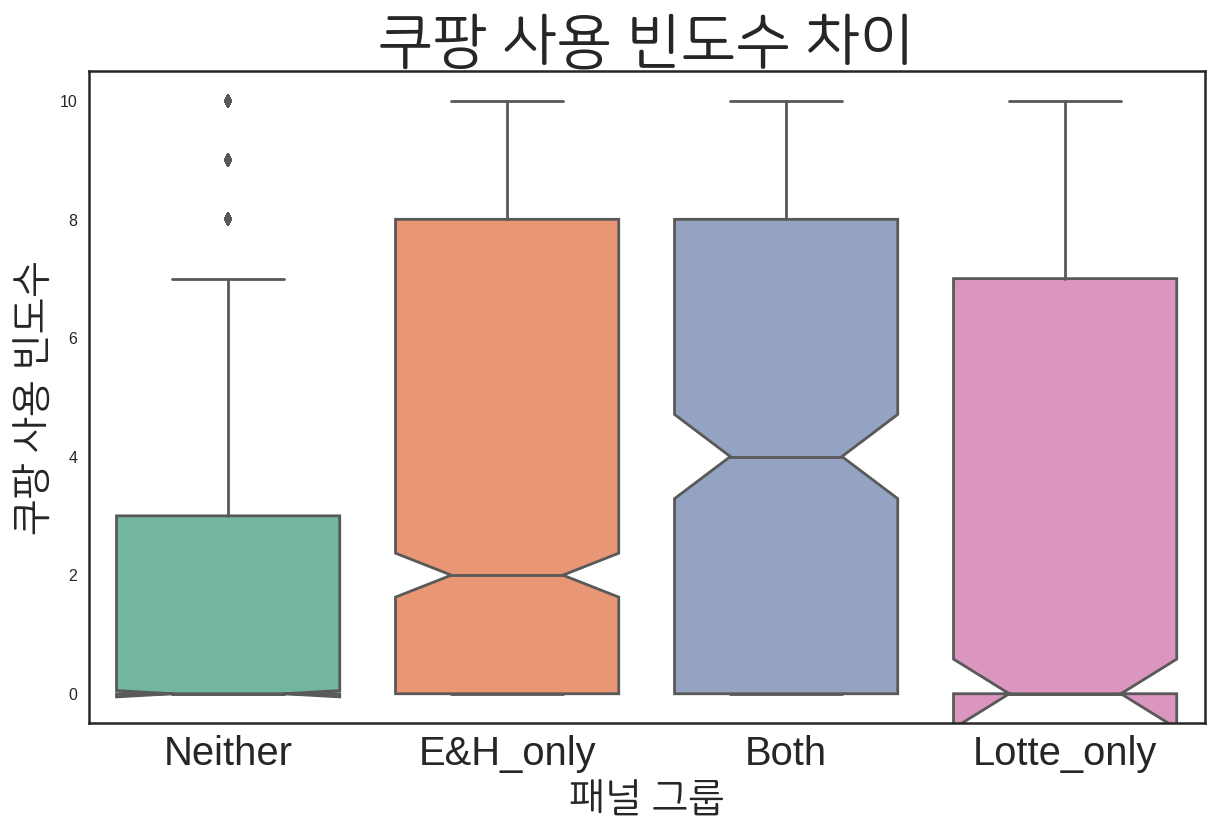

In [56]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'mart_target_str', y = 'App_쿠팡', data = DA_mart, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('쿠팡 사용 빈도수', fontproperties=fontprop, fontsize=20)
plt.title('쿠팡 사용 빈도수 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [46]:
DA_mart_1.groupby('mart_target_str')['App_식음료'].agg([np.mean, np.std, np.median])

,mean,std,median
mart_target_str,,,
Both,2.767635,3.176074,1.0
E&H_only,2.530187,3.032955,1.0
Lotte_only,2.129139,2.814275,0.0
Neither,1.697956,2.657174,0.0


In [43]:
DA_mart_1 = DA_mart[lambda x: x['App_식음료'] < 10]

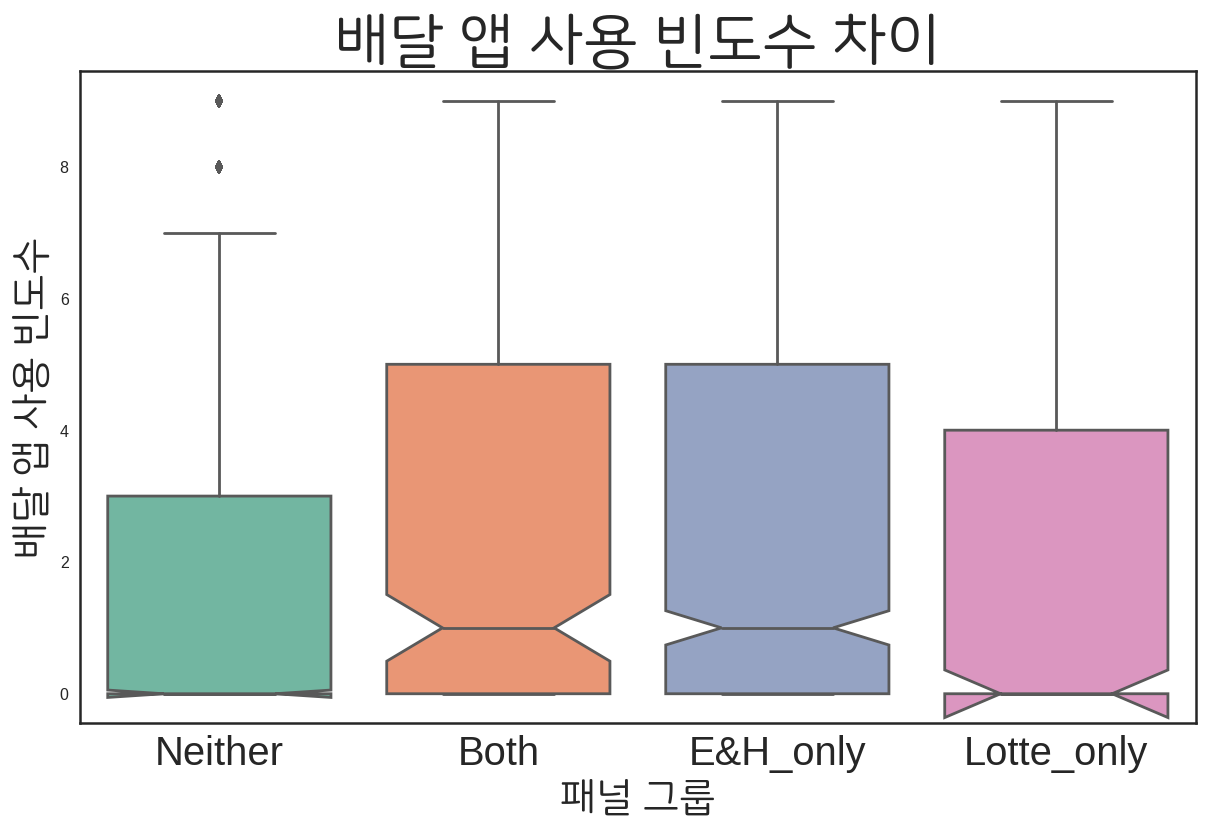

In [44]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'mart_target_str', y = 'App_식음료', data = DA_mart_1, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('배달 앱 사용 빈도수', fontproperties=fontprop, fontsize=20)
plt.title('배달 앱 사용 빈도수 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [36]:
DA_mart.groupby('mart_target_str')['Mean_Google Play 게임'].agg([np.mean, np.std, np.median])

,mean,std,median
mart_target_str,,,
Both,3.362447,7.889813,0.0
E&H_only,3.332592,7.586382,0.0
Lotte_only,2.783059,6.332434,0.0
Neither,4.975282,8.351167,0.0


In [48]:
DA_mart_2 = DA_mart[lambda x: x['Mean_Google Play 게임'] < 10]

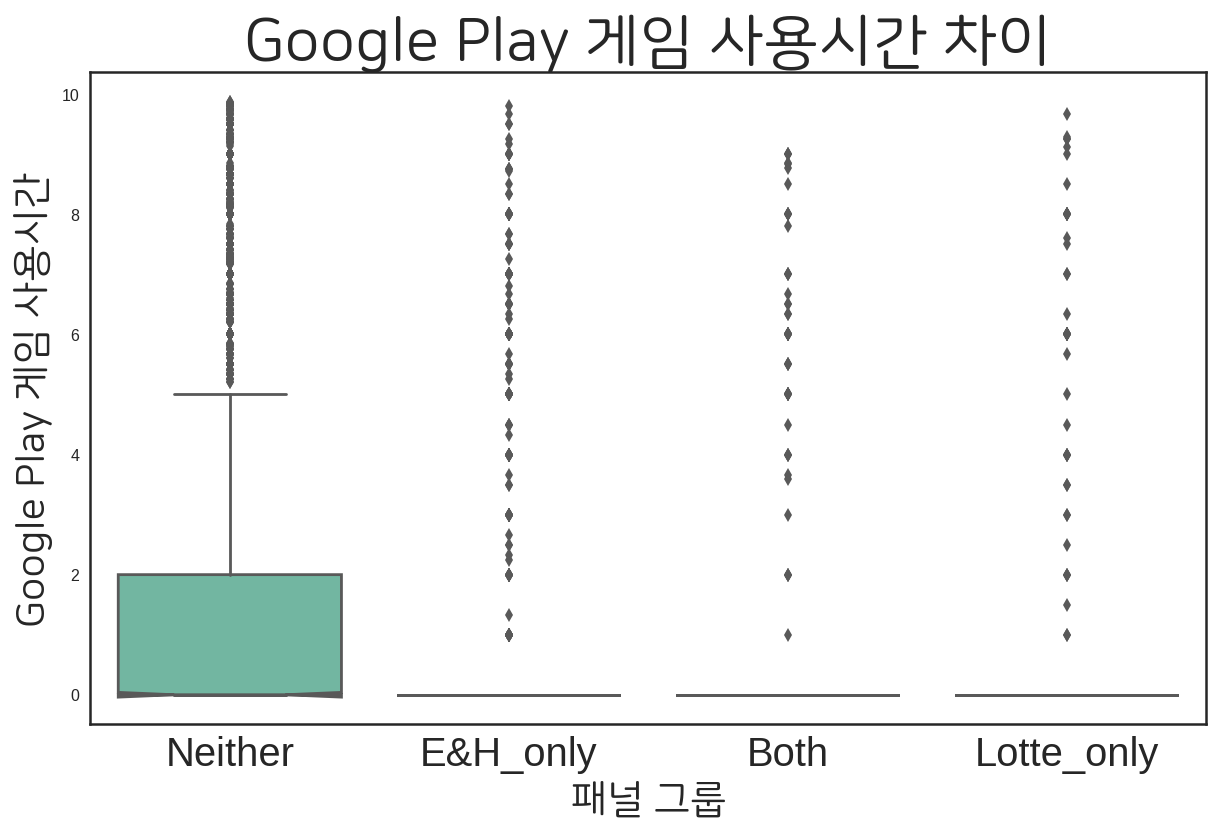

In [49]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'mart_target_str', y = 'Mean_Google Play 게임', data = DA_mart_2, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('Google Play 게임 사용시간', fontproperties=fontprop, fontsize=20)
plt.title('Google Play 게임 사용시간 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [37]:
DA_mart.groupby('mart_target_str')['Mean_현대카드'].agg([np.mean, np.std, np.median])

,mean,std,median
mart_target_str,,,
Both,5.722085,11.665407,0.0
E&H_only,4.996586,10.945503,0.0
Lotte_only,4.625498,10.761474,0.0
Neither,3.132437,8.820011,0.0


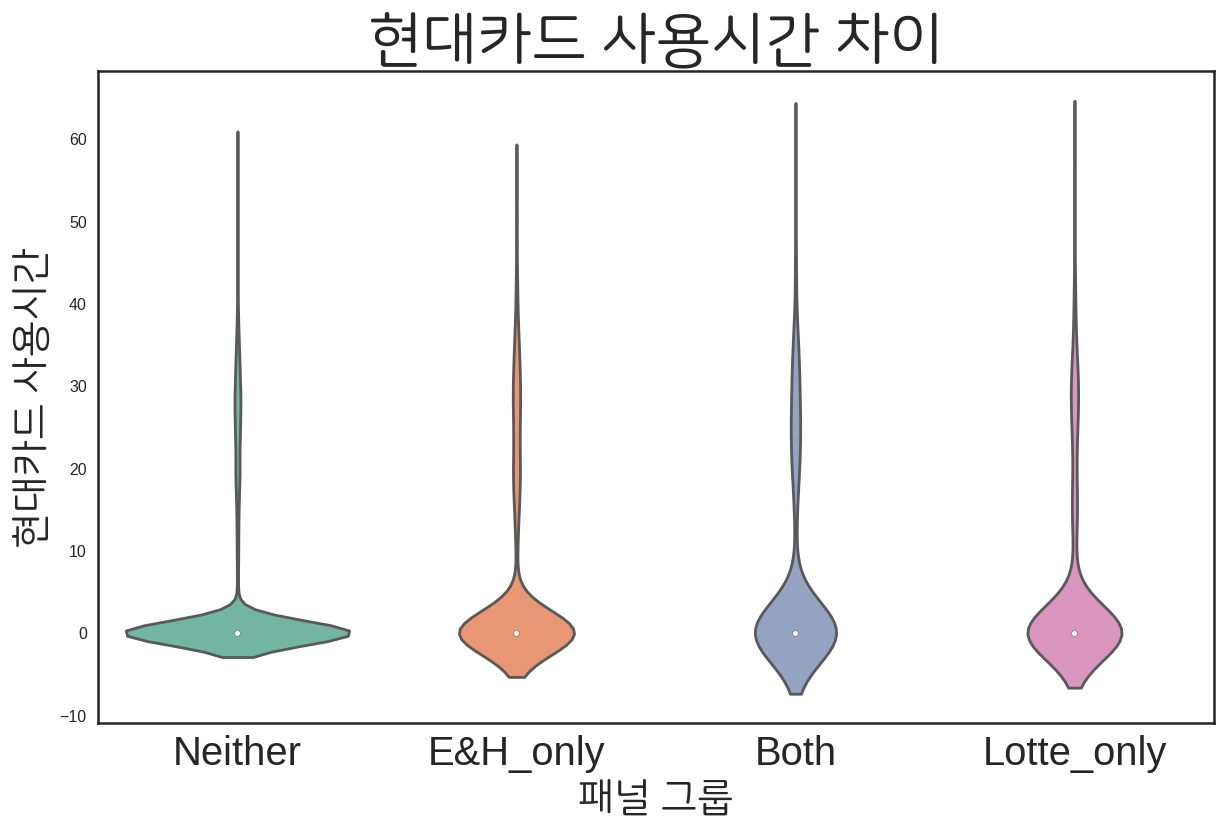

In [51]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'mart_target_str', y = 'Mean_현대카드', data = DA_mart, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('현대카드 사용시간', fontproperties=fontprop, fontsize=20)
plt.title('현대카드 사용시간 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [ ]:
DA_movie_hotel_1 = DA_movie_hotel[lambda x: x['App_app_count_mean'] < 80]

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'movie_hotel_target_str', y = 'App_app_count_mean', data = DA_movie_hotel_1, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('평균 사용 앱 수', fontproperties=fontprop, fontsize=20)
plt.title('평균적으로 사용하는 앱 개수 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [ ]:
DA_movie_hotel.groupby('movie_hotel_target')['PS_family_00s'].agg([np.mean, np.std, np.median])

In [ ]:
DA_movie_hotel['PS_family_00s_binary'] = DA_movie_hotel['PS_family_00s'].map(lambda x: 1 if x > 0 else 0)

In [ ]:
tmp1 = DA_movie_hotel.groupby(['movie_hotel_target_str','PS_family_00s_binary'])['PS_family_00s'].count().reset_index()

In [ ]:
tmp1 = tmp1.set_index(['movie_hotel_target_str','PS_family_00s_binary']).unstack().reset_index()

In [ ]:
tmp1.columns = tmp1.columns.droplevel()

In [ ]:
tmp1 = tmp1.rename(columns={'':'class'}).reset_index(drop=True)

In [ ]:
tmp1['rate'] = tmp1[1]/(tmp1[0] + tmp1[1])

In [ ]:
tmp1

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x = 'class', y = 'rate', data = tmp1, palette = "Set2")

plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('10세 미만 가족이 있는 패널의 비율', fontproperties=fontprop, fontsize=20)
plt.title('10세 미만 가족이 있는 패널의 비율 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [ ]:
DA_movie_hotel.groupby('movie_hotel_target')['PS_age'].agg([np.mean, np.std, np.median])

In [ ]:
DA_movie_hotel_2 = DA_movie_hotel[lambda x: x['PS_age'] < 70]

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'movie_hotel_target_str', y = 'PS_age', data = DA_movie_hotel_2, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('연령', fontproperties=fontprop, fontsize=20)
plt.title('패널 그룹별 연령 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [ ]:
DA_movie_hotel.groupby('movie_hotel_target')['App_Facebook'].agg([np.mean, np.std, np.median])

In [ ]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'movie_hotel_target_str', y = 'App_Facebook', data = DA_movie_hotel, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('페이스북 앱 사용 빈도', fontproperties=fontprop, fontsize=20)
plt.title('페이스북 앱 사용 빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()